## Titanic Dataset Pre-processing

In [1]:
import pandas as pd
import numpy as np
from DecisionTree import *
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("./data/trainTitanic.csv")
filter_df = df.drop('Name', axis=1)
filter_df = filter_df.drop('Ticket', axis=1)
filter_df = filter_df.drop('Cabin', axis=1)

test_df = filter_df
test_df = test_df[test_df["Age"].notna()]

cols = test_df.columns.tolist()
cols = cols[0:1] + cols[2:] + cols[1:2]

test_df = test_df[cols]

sex_mapping = {'male': 0, 'female': 1}
embarked_mapping = {'S': 0, 'C': 1}

test_df['Sex'] = test_df['Sex'].map(sex_mapping)
test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping)

test_df = test_df.dropna()
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,0,22.0,1,0,7.2500,0.0,0
1,2,1,1,38.0,1,0,71.2833,1.0,1
2,3,3,1,26.0,0,0,7.9250,0.0,1
3,4,1,1,35.0,1,0,53.1000,0.0,1
4,5,3,0,35.0,0,0,8.0500,0.0,0
...,...,...,...,...,...,...,...,...,...
883,884,2,0,28.0,0,0,10.5000,0.0,0
884,885,3,0,25.0,0,0,7.0500,0.0,0
886,887,2,0,27.0,0,0,13.0000,0.0,0
887,888,1,1,19.0,0,0,30.0000,0.0,1


In [3]:
data_np = test_df.to_numpy(dtype=object)[:, 1:]
data_np

array([[3, 0, 22.0, ..., 7.25, 0.0, 0],
       [1, 1, 38.0, ..., 71.2833, 1.0, 1],
       [3, 1, 26.0, ..., 7.925, 0.0, 1],
       ...,
       [2, 0, 27.0, ..., 13.0, 0.0, 0],
       [1, 1, 19.0, ..., 30.0, 0.0, 1],
       [1, 0, 26.0, ..., 30.0, 1.0, 1]], dtype=object)

In [4]:
data_np.shape

(684, 8)

## My Implementation

In [5]:
test1 = DecisionTree(max_depth=5)
test1.build_tree(data=data_np)

In [6]:
test1.print_tree()

Feature 1 < 0.5
Left:
  Feature 2 < 9.5
  Left:
    Feature 3 < 2.5
    Left:
      Leaf: 1
    Right:
      Feature 2 < 3.5
      Left:
        Feature 2 < 2.5
        Left:
          Leaf: 0
        Right:
          Leaf: 1
      Right:
        Leaf: 0
  Right:
    Feature 0 < 1.5
    Left:
      Feature 2 < 53.0
      Left:
        Feature 5 < 25.9375
        Left:
          Leaf: 0
        Right:
          Leaf: 0
      Right:
        Feature 2 < 75.5
        Left:
          Leaf: 0
        Right:
          Leaf: 1
    Right:
      Feature 5 < 51.697900000000004
      Left:
        Feature 5 < 19.5
        Left:
          Leaf: 0
        Right:
          Leaf: 0
      Right:
        Feature 0 < 2.5
        Left:
          Leaf: 0
        Right:
          Leaf: 1
Right:
  Feature 0 < 2.5
  Left:
    Feature 2 < 2.5
    Left:
      Feature 0 < 1.5
      Left:
        Leaf: 0
      Right:
        Leaf: 1
    Right:
      Feature 5 < 28.85625
      Left:
        Feature 5 < 28.23125
  

## Sklearn Implementation

In [7]:
y_pred = data_np[:,7:8]
mapper = np.vectorize(lambda x: "No" if x == 0 else "Yes")
y_pred_mapped = mapper(y_pred)
y_pred_mapped

array([['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],

In [8]:
clf = DecisionTreeClassifier(max_depth=5)
clf = clf.fit(data_np[:,:7], y_pred_mapped)

## Comparison

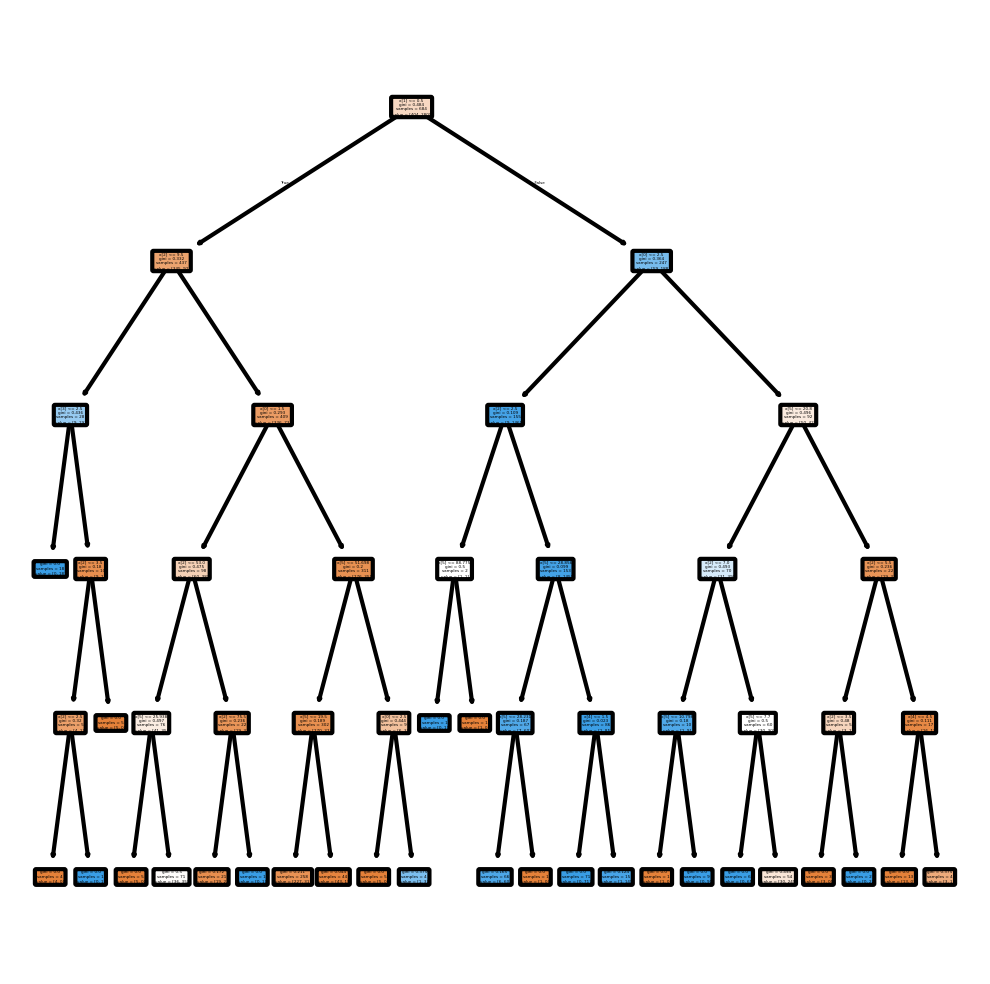

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt



fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(clf,filled=True,rounded=True, ax=axes)
plt.savefig('tree.svg', format='svg', dpi=1200)

In [10]:
test1.print_tree()

Feature 1 < 0.5
Left:
  Feature 2 < 9.5
  Left:
    Feature 3 < 2.5
    Left:
      Leaf: 1
    Right:
      Feature 2 < 3.5
      Left:
        Feature 2 < 2.5
        Left:
          Leaf: 0
        Right:
          Leaf: 1
      Right:
        Leaf: 0
  Right:
    Feature 0 < 1.5
    Left:
      Feature 2 < 53.0
      Left:
        Feature 5 < 25.9375
        Left:
          Leaf: 0
        Right:
          Leaf: 0
      Right:
        Feature 2 < 75.5
        Left:
          Leaf: 0
        Right:
          Leaf: 1
    Right:
      Feature 5 < 51.697900000000004
      Left:
        Feature 5 < 19.5
        Left:
          Leaf: 0
        Right:
          Leaf: 0
      Right:
        Feature 0 < 2.5
        Left:
          Leaf: 0
        Right:
          Leaf: 1
Right:
  Feature 0 < 2.5
  Left:
    Feature 2 < 2.5
    Left:
      Feature 0 < 1.5
      Left:
        Leaf: 0
      Right:
        Leaf: 1
    Right:
      Feature 5 < 28.85625
      Left:
        Feature 5 < 28.23125
  

My implementation is working on Titanic Dataset as well :)

## Testing Prediction

In [11]:
data_np

array([[3, 0, 22.0, ..., 7.25, 0.0, 0],
       [1, 1, 38.0, ..., 71.2833, 1.0, 1],
       [3, 1, 26.0, ..., 7.925, 0.0, 1],
       ...,
       [2, 0, 27.0, ..., 13.0, 0.0, 0],
       [1, 1, 19.0, ..., 30.0, 0.0, 1],
       [1, 0, 26.0, ..., 30.0, 1.0, 1]], dtype=object)

In [12]:
data_to_predict = data_np[:15,:7]
data_to_predict

array([[3, 0, 22.0, 1, 0, 7.25, 0.0],
       [1, 1, 38.0, 1, 0, 71.2833, 1.0],
       [3, 1, 26.0, 0, 0, 7.925, 0.0],
       [1, 1, 35.0, 1, 0, 53.1, 0.0],
       [3, 0, 35.0, 0, 0, 8.05, 0.0],
       [1, 0, 54.0, 0, 0, 51.8625, 0.0],
       [3, 0, 2.0, 3, 1, 21.075, 0.0],
       [3, 1, 27.0, 0, 2, 11.1333, 0.0],
       [2, 1, 14.0, 1, 0, 30.0708, 1.0],
       [3, 1, 4.0, 1, 1, 16.7, 0.0],
       [1, 1, 58.0, 0, 0, 26.55, 0.0],
       [3, 0, 20.0, 0, 0, 8.05, 0.0],
       [3, 0, 39.0, 1, 5, 31.275, 0.0],
       [3, 1, 14.0, 0, 0, 7.8542, 0.0],
       [2, 1, 55.0, 0, 0, 16.0, 0.0]], dtype=object)

Okay, let's predict with my implementation

In [13]:
test1.predict(data_to_predict)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1]])

Let's try to predict with the Sklearn tree

In [14]:
predictions = clf.predict(data_to_predict)
predictions

array(['No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'Yes'], dtype='<U3')

### Calculate Accuracy on Training Set

In [15]:
test1.calculate_accuracy(data_np)

0.8508771929824561

In [16]:
predictions_all = clf.predict(data_np[:,:7])
predictions_all

array(['No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Y

In [17]:
accuracy_score(y_pred_mapped, predictions_all)

0.8508771929824561

Don't know why mine is 0.8508771929824561 and sklearn is 0.8494152046783626, but that's close enough for me.

## Regularization

Some ideas for the regularization are:

- Limiting Max_Depth - Done ✅
- Minimum Number of Samples to Split - Done ✅
- Minimum Impurity Decrease - Done ✅
- Limiting the number of total leaves - (end it up not implementig this cause it's pretty much the same as max_depth)

In [18]:
# Example sklearn
tree_clf_example = DecisionTreeClassifier(
    max_depth=10, 
    min_samples_split=20,
    ccp_alpha=0.01,
    random_state=42
)

Let's add some regularization and see if accuracy on the training set decreases (it should)

In [19]:
tree_reg = DecisionTree(
    max_depth=5,
    min_samples_split = 400,
)
tree_reg.build_tree(data=data_np)

tree_reg.calculate_accuracy(data_np)

0.793859649122807

In [20]:
tree_reg.print_tree()

Feature 1 < 0.5
Left:
  Feature 2 < 9.5
  Left:
    Leaf: 1
  Right:
    Feature 0 < 1.5
    Left:
      Leaf: 0
    Right:
      Leaf: 0
Right:
  Leaf: 1


Another test now with min_gini_change

In [21]:
tree_reg2 = DecisionTree(
    max_depth=5,
    min_gini_change = 0.05,
)
tree_reg2.build_tree(data=data_np)

In [22]:
tree_reg2.calculate_accuracy(data_np)

0.8070175438596491

In [23]:
tree_reg2.print_tree()

Feature 1 < 0.5
Left:
  Leaf: 0
Right:
  Feature 0 < 2.5
  Left:
    Feature 2 < 2.5
    Left:
      Feature 0 < 1.5
      Left:
        Leaf: 0
      Right:
        Leaf: 1
    Right:
      Leaf: 1
  Right:
    Feature 5 < 20.799999999999997
    Left:
      Leaf: 1
    Right:
      Feature 2 < 5.5
      Left:
        Feature 2 < 3.5
        Left:
          Leaf: 0
        Right:
          Leaf: 1
      Right:
        Feature 4 < 4.5
        Left:
          Leaf: 0
        Right:
          Leaf: 0
